In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


** Nome: Coloque o eu nome aqui.

**Treinando um Classificador de Produto com Redes Neurais**

O conjunto de dados abaixo consiste em reclamações de clientes a cerca de produtos/serviços oferecidos em uma instituição bancária. 

In [19]:
d = pd.read_csv('/content/drive/MyDrive/Attenty/Bolsistas/Tarefa Bolsistas - Ciência dos dados/Gabarito/customer-issues.csv')
display(d.head())

,date-received,product,sub-product,issue,sub-issue,consumer-message,state,zip-code,tags,via,resolution,timely-response?,disputed?,complaint-id
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,AL,352XX,NaN,Web,Closed with explanation,Yes,No,2141773
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,PA,177XX,Older American,Web,Closed with explanation,Yes,No,2163100
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,VA,224XX,NaN,Web,Closed with explanation,Yes,No,1420702
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,TX,752XX,NaN,Web,Closed with explanation,Yes,Yes,1772196
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,NE,693XX,NaN,Web,Closed with explanation,Yes,Yes,1790634


Exibindo as quatro primeiras mensagens

In [20]:
print(*d.loc[:4, 'consumer-message'], sep='\n\n')

I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements

I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had b

Abaixo temos o gráfico de frequências de produto sobre as conversas. Observa-se que este é um problema extremamente desbalanceado. Há, entretanto, amostras suficientes para a modelagem de um classificador de produtos levando em consideração o diálogo do cliente. **Para isso, selecione as seis classes de produto mais frequentes do dataset e descarte o restante das amostras**. Em seguida, **treine uma rede neural de sua escolha** para classificar produtos baseado nos comentários dos clientes. 

In [21]:
def frequencies(dataset, column):
    labels, counts = np.unique(dataset[column], return_counts=True)
    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]
    
    (sns
     .barplot([l[:40] for l in labels], counts)
     .set_title(f'Occurrences for The {len(labels)} Classes in {column}'))
    plt.xticks(rotation=90)
    
    return labels, counts

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


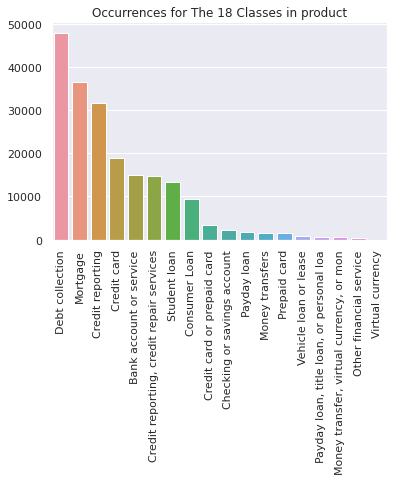

In [22]:
labels, counamts = frequencies(d, 'product')

**Observações**: 
*   Para esta tarefa você deve utilizar o Pytorch.
*   Reporte todas as escolhas e observações que achar necessárias neste notebook. Todos os comentários e escolhas de projeto serão levadas em consideração no momento da seleção.
* As mensagens contidas no conjunto de dados possuem uma relação temporal por isso é importante realizar a separação dos sub-conjuntos de treino/teste respeitando esta relação, de forma a garantir que o modelo não seja treinado sobre amostras no futuro e experimentado sobre o passado.
* Só serão aceitas respostas entregues neste notebook.
* Entregue o notebook com o modelo treinado.
* Todo o pré-processamento dos dados e processo de separação é da escolha do cientista de dados. 
* Você pode treinar mais de um modelo e comparar resultados também, fique a vontade para escolher as melhores estratégias.
* Lembre de computar a acurácia balanceada e a matriz de confusão sobre o conjunto de teste.